# <center> Taller Keras $-$ Ejercicio 1

El objetivo de este ejercicio es implementar una red neuronal multicapa, únicamente para clasificar los dígitos 0 y 1 de la base de datos MNIST.

__Objetivos:__
* Implementar una red neuronal en Keras, para un problema de clasificación binaria.
* Aprender el uso de la función de pérdida 'binary_crossentropy'.
* Experimentar con distintos métodos de optimización.
* Experimentar con distintas funciones de activación.

## Quistian Navarro Juan Luis

In [462]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras import models
from keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from pandas import DataFrame
from pandas_ml import ConfusionMatrix
from plotmatrix import pretty_plot_confusion_matrix, PlotMatrix

In [463]:
# cargar la interfaz a la base de datos que viene con Keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# colectar los dígitos 0 y 1
tr0 = np.where(train_labels==0)[0]
tr1 = np.where(train_labels==1)[0]
ts0 = np.where(test_labels==0)[0]
ts1 = np.where(test_labels==1)[0]
tr_idx = np.hstack([tr0, tr1])
ts_idx = np.hstack([ts0, ts1])

# nuevo sub-conjunto de datos
train_images = train_images[tr_idx]
train_labels = train_labels[tr_idx]
test_images = test_images[ts_idx]
test_labels = test_labels[ts_idx]

In [464]:
print('train images shape:', train_images.shape)
print('train labels shape:', train_labels.shape)
print('test images shape:', test_images.shape)
print('test labels shape:', test_labels.shape)

train images shape: (12665, 28, 28)
train labels shape: (12665,)
test images shape: (2115, 28, 28)
test labels shape: (2115,)


Ahora, el conjunto sólo tiene 12665 datos de entrenamiento, y 2115 datos de prueba.

In [465]:
# pre-procesamiento de los datos
train_images = train_images.reshape((-1, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28*28))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

## Diseño de la red

__Ejercicio:__ Diseñe una red neuronal con varias capas ocultas, más una capa de salida (como en la figura). Las capas deben ser densas.

¿Cuántas neuronas debe tener la capa de salida?

Experimente con diferente número de capas (no demasiadas, entre 1 y 5).

Experimente con diferente número de neuronas en las capas ocultas (puede usar potencias de 2 si lo prefiere).

Experimente con diferentes funciones de activación en las capas ocultas (e.g. 'relu', 'tanh', 'sigmoid', None).

Por ser clasificación binaria, en la capa de salida puede usar la activación 'sigmoid'. Si lo desea, puede experimentar con otras funciones de activación.

In [466]:
### START CODE HERE ### (≈ 3-7 lines of code)
network = models.Sequential()
if 'network' in globals(): del network
network = models.Sequential()
network.add(layers.Dense(252, activation='relu', input_shape= data_shape, name= 'dense1'))
network.add(layers.Dense(64, activation='relu', name= 'dense2'))
network.add(layers.Dense(2, activation='sigmoid', name= 'output_layer'))

### END CODE HERE ###

In [467]:
network.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 252)               197820    
_________________________________________________________________
dense2 (Dense)               (None, 64)                16192     
_________________________________________________________________
output_layer (Dense)         (None, 2)                 130       
Total params: 214,142
Trainable params: 214,142
Non-trainable params: 0
_________________________________________________________________


__Ejercicio:__ Compile y entrene la red neuronal. Como es un problema de clasificación binaria (0 ó 1), utilice como función de pérdida 'binary_crossentropy'

Utilice el optimizador 'RMSprop' con un learning rate apropiado. Consulte la documentación de Keras y utilice otros optimizadores (e.g. 'sgd', 'adam', 'adagrad', 'adadelta', 'adamax').

Experimente cambiando diferentes valores para learning rate (e.g. 0.1, 0.05, 0.01, ...) Estos valores pueden cambiar, dependiendo del optimizador que se use.

Experimente cambiando tamaños de batch entre 1 y 256 (se sugiere usar potencias de 2).

Finalmente, compare sus modelos y determine cuál tiene el menor error de clasificación (mayor accuracy).

In [468]:
### START CODE HERE ### (≈ 2 lines of code)
opt = optimizers.RMSprop(lr=0.001)
network.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
### END CODE HERE ###


### START CODE HERE ### (≈ 3 lines of code)
tic = time()
history = network.fit(train_images, train_labels, epochs=7, batch_size=64, validation_split=0.16666)
print('total training time:', time()-tic, 'seconds')
### END CODE HERE ###

Epoch 1/7
165/165 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0203 - val_accuracy: 0.9948
Epoch 2/7
165/165 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0055 - val_accuracy: 0.9986
Epoch 3/7
165/165 [==============================] - 1s 5ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9991
Epoch 4/7
 68/165 [===========>..................] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995

165/165 [==============================] - 1s 8ms/step - loss: 6.4471e-04 - accuracy: 0.9998 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 5/7
165/165 [==============================] - 1s 6ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 6/7
165/165 [==============================] - 1s 7ms/step - loss: 1.7268e-04 - accuracy: 0.9999 - val_loss: 0.0029 - val_accuracy: 0.9991
Epoch 7/7
165/165 [==============================] - 1s 6ms/step - loss: 6.4129e-04 - accuracy: 0.9999 - val_loss: 0.0017 - val_accuracy: 0.9995
total training time: 6.9379167556762695 seconds


### Ver el historial de desempeño de la red

In [469]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

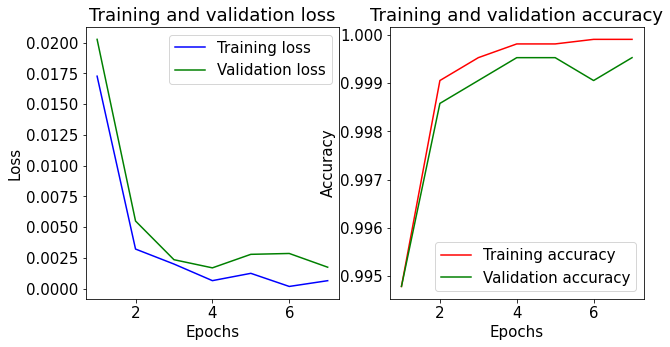

In [470]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultados

In [471]:
results = network.evaluate(test_images, test_labels)
print('results loss:', results[0])
print('results accuracy:', results[1])

67/67 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9995
results loss: 0.001842229743488133
results accuracy: 0.9995272159576416


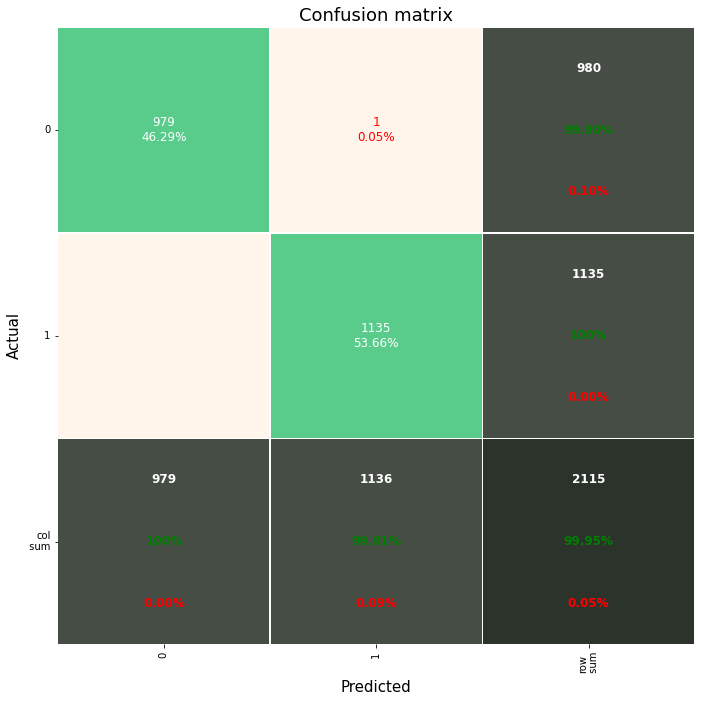

In [472]:
pred = network.predict(test_images)
predictions = np.argmax(pred, 1)

test_labs = np.argmax(test_labels, 1)
conf_matrix = ConfusionMatrix(test_labs, predictions)

# plot confusion matrix
CM = conf_matrix.to_array()
cf = DataFrame(CM)
pretty_plot_confusion_matrix(cf, annot=True, pred_val_axis='x', figsize=(10,10), fz=12)

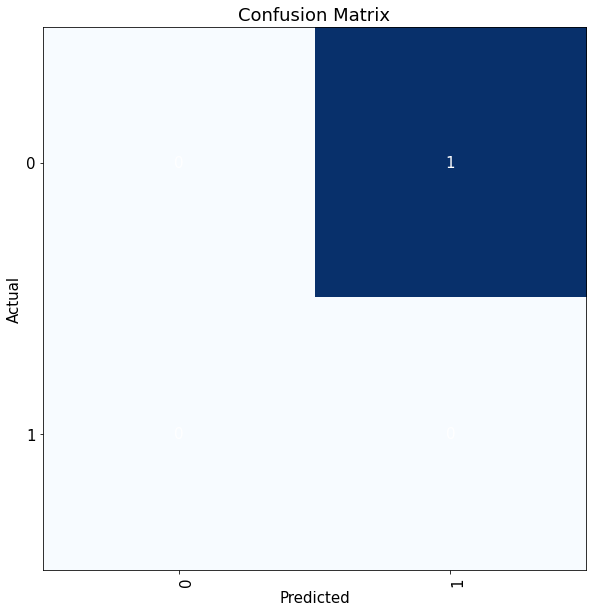

0

In [473]:
# other plot
PlotMatrix(CM, figsize=(10,10), cmap=plt.cm.Blues, title='Confusion Matrix', fz=15)

---

---

## Conclusions